In [4]:
import pandas as pd
import os
import re
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np


dataset_path = '../dataset'
datafile = dataset_path + '/Data Chest X-Ray RSUA (Validated)/Split_Data_RSUA_Paths_k3.xlsx'

data = pd.read_excel(datafile, index_col=0)

def grid_show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()

def plot_image(image_sample):
    plt.imshow(image_sample, cmap='gray')  # Puoi cambiare 'gray' se l'immagine è a colori
    plt.axis('off')  # Rimuovi gli assi per una visualizzazione pulita
    plt.show()

def plot_grid_images(images, nrow=1):
    for i in range(len(images)):
        images[i] = images[i].permute(2, 0, 1)
            
    grid = make_grid(images, nrow=nrow)
    grid = grid.permute(1, 2, 0)
    plot_image(grid)

Added 0 col Non_Covid
File ../dataset/Data Chest X-Ray RSUA (Validated)/Non_Covid/npy_images/CXR_Images_231.npy size 262272 shape (256, 256, 1)
Image torch.Size([256, 256, 1]) mask torch.Size([256, 256, 1])


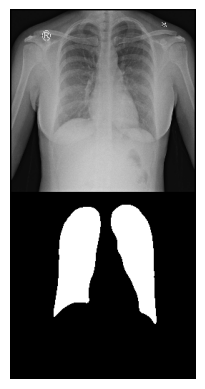

In [ ]:
import numpy
import torch
labels = []
samples = torch.tensor([])
sam = []
for index,col in data.iterrows():
    splitted = col['images_path'].split('/')
    label = splitted[-3]
    if label not in labels:
        labels.append(label)
        label_id = len(labels)-1
        print("Added %d col %s" %(label_id, label))
    else:
        label_id = labels.index(label)
    mask_path = col['masks_path']
    image_path = col['images_path']
    image_path = re.sub(r'Data Thorax DICOM RSUA \(Validated\)', 'Data Chest X-Ray RSUA (Validated)', image_path)
    mask_path = re.sub(r'Data Thorax DICOM RSUA \(Validated\)', 'Data Chest X-Ray RSUA (Validated)', mask_path)
    # image_path = re.sub(r'.npy', '.bmp', image_path)
    image_path = Path(dataset_path+'/'+image_path)
    mask_path = Path(dataset_path+'/'+mask_path)
    # print("index %d col %s %s" %(index, mask, path))
    if not image_path.exists():
        print("Path %s does not exist" %image_path)
    else:
        image_length = os.path.getsize(str(image_path))
        image_sample = numpy.load(str(image_path))
        print ( "File %s size %d shape %s" %(image_path, image_length, image_sample.shape))

    if not mask_path.exists():
        print("Path %s does not exist" %mask_path)
    else:

        image_length = os.path.getsize(mask_path)
        mask_sample = numpy.load(str(mask_path))

        image_tensor = torch.tensor(image_sample)
        mask_tensor = torch.tensor(mask_sample)
        print ( "Image %s mask %s" %(str(image_tensor.shape), str(mask_tensor.shape)))
        plot_grid_images([image_tensor, mask_tensor], nrow=2)  
        # plot_image(mask_sample)
        print ( "File %s size %d" %(mask_path, image_length))
    # image_sample = torch.tensor(image_sample)
    print ( "Sample size %s" %(str(image_sample.shape)))

    sample = torch.from_numpy(image_sample)
    label = torch.tensor(label_id)
    samples = torch.cat((samples, torch.tensor(image_sample).unsqueeze(0)), dim=0)
    sam.append([sample,label])
for label_id in range(len(labels)):
    print("Id %d %s" %(label_id, labels[label_id]))